In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
import datetime

In [3]:
os.environ['KMP_DUPLICATE_LIB_OK']='True' # solves xgboost conflict 'OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.'

In [4]:
filename = 'pp.csv'

In [5]:
data = pd.read_csv(filename)
data = pd.read_csv(filename,header=0, usecols=[0,1,2,3,4,5,6], parse_dates=True,
                   names=('Idx','Price', 'Date', 'PC', 'Type', 'Newold', 'Freehold'))

In [6]:
len(data)

24020161

In [7]:
data['year']  = pd.DatetimeIndex(data['Date']).year

In [8]:
data['month']  = pd.DatetimeIndex(data['Date']).month

In [73]:
data['day']  = pd.DatetimeIndex(data['Date']).dayofweek

In [75]:
data['day_month']  = pd.DatetimeIndex(data['Date']).day

In [9]:
data['year'].values

array([1995, 1995, 1995, ..., 2018, 2018, 2018])

In [10]:
data['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018])

In [11]:
data.head()

,Idx,Price,Date,PC,Type,Newold,Freehold,year,month
0,0,122000,1995-09-29 00:00,NG14 5DE,D,N,F,1995,9
1,1,37000,1995-12-22 00:00,CV21 2JJ,T,N,F,1995,12
2,2,93500,1995-07-27 00:00,UB8 2AP,D,N,F,1995,7
3,3,32000,1995-03-03 00:00,HD6 4AD,T,N,F,1995,3
4,4,38000,1995-09-08 00:00,B30 3PP,T,N,F,1995,9


In [12]:
len(data)

24020161

In [13]:
data[(data['month'] == 12) | (data['month'] == 1) | (data['month'] == 2)].head()

,Idx,Price,Date,PC,Type,Newold,Freehold,year,month
1,1,37000,1995-12-22 00:00,CV21 2JJ,T,N,F,1995,12
11,11,8000,1995-12-22 00:00,BB2 1HT,T,N,F,1995,12
17,17,36500,1995-12-01 00:00,HU7 0DW,S,N,F,1995,12
21,21,46500,1995-12-15 00:00,SO30 3FB,T,N,F,1995,12
26,26,39950,1995-02-28 00:00,HU9 1QD,F,Y,L,1995,2


In [32]:
winter = data[(data['month'] == 12) | (data['month'] == 1) | (data['month'] == 2) & (data['Type'] != 'O')]

In [33]:
spring = data[(data['month'] == 3) | (data['month'] == 4) | (data['month'] == 5) & (data['Type'] != 'O')]

In [34]:
summer = data[(data['month'] == 6) | (data['month'] == 7) | (data['month'] == 8) & (data['Type'] != 'O')]

In [35]:
autumn = data[(data['month'] == 9) | (data['month'] == 10) | (data['month'] == 11) & (data['Type'] != 'O')]

In [36]:
detached = data[data['Type'] == 'D']

In [37]:
semi = data[data['Type'] == 'S']

In [38]:
terraced = data[data['Type'] == 'T']

In [39]:
flat = data[data['Type'] == 'F']

In [40]:
other = data[data['Type'] == 'O']

In [41]:
autumn.shape[0]

6281588

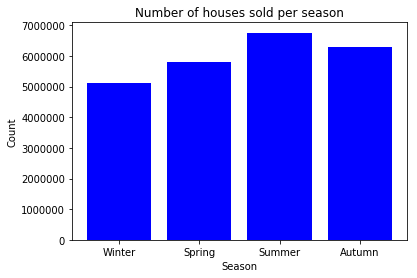

In [46]:
import matplotlib.pyplot as plt
#winter['month'].value_counts().sort_index().plot(kind='bar', color = 'b')
seasons = (winter.shape[0], spring.shape[0], summer.shape[0], autumn.shape[0])
plt.bar(np.arange(4),seasons, color = 'b')
plt.title('Number of houses sold per season')
plt.xticks([0,1,2,3],['Winter','Spring','Summer','Autumn'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.savefig('Number_of_houses_sold_per_season_exclude_others.pdf')

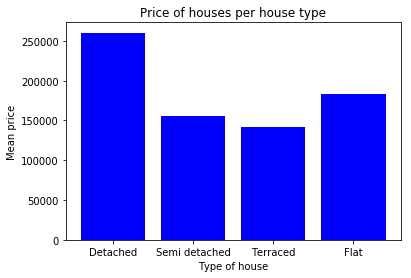

In [48]:
#winter['month'].value_counts().sort_index().plot(kind='bar', color = 'b')
houses = (detached['Price'].mean(), semi['Price'].mean(), terraced['Price'].mean(), flat['Price'].mean())
plt.bar(np.arange(4),houses, color = 'b')
plt.title('Price of houses per house type')
plt.xticks([0,1,2,3],['Detached', 'Semi detached', 'Terraced', 'Flat'])
plt.xlabel('Type of house')
plt.ylabel('Mean price')
plt.savefig('price_of_houses_per_house_type_exclude_others.pdf')

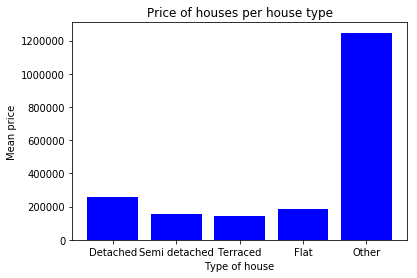

In [55]:
#winter['month'].value_counts().sort_index().plot(kind='bar', color = 'b')
houses = (detached['Price'].mean(), semi['Price'].mean(), terraced['Price'].mean(), flat['Price'].mean(), other['Price'].mean())
plt.bar(np.arange(5),houses, color = 'b')
plt.title('Price of houses per house type')
plt.xticks([0,1,2,3,4],['Detached', 'Semi detached', 'Terraced', 'Flat', 'Other'])
plt.xlabel('Type of house')
plt.ylabel('Mean price')
plt.savefig('price_of_houses_per_house_type.pdf')

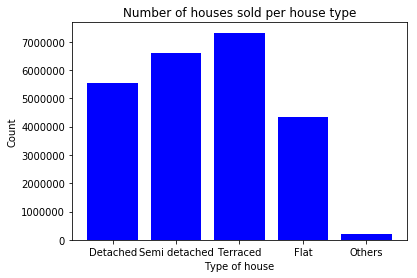

In [52]:
#winter['month'].value_counts().sort_index().plot(kind='bar', color = 'b')
houses = (len(detached), len(semi), len(terraced), len(flat), len(other))
plt.bar(np.arange(5),houses, color = 'b')
plt.title('Number of houses sold per house type')
plt.xticks([0,1,2,3,4],['Detached', 'Semi detached', 'Terraced', 'Flat', 'Others'])
plt.xlabel('Type of house')
plt.ylabel('Count')
plt.savefig('houses_sold_per_house_type.pdf')

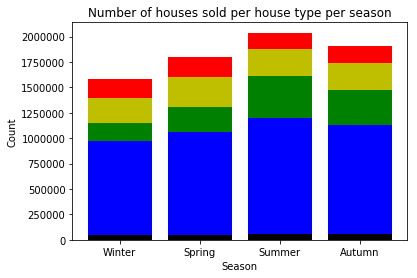

In [24]:
import matplotlib.pyplot as plt
#winter['month'].value_counts().sort_index().plot(kind='bar', color = 'b')
seasons_T = (winter['Type'].value_counts()[0], spring['Type'].value_counts()[0], summer['Type'].value_counts()[0], autumn['Type'].value_counts()[0])
seasons_S = (winter['Type'].value_counts()[1], spring['Type'].value_counts()[1], summer['Type'].value_counts()[1], autumn['Type'].value_counts()[1])
seasons_D = (winter['Type'].value_counts()[2], spring['Type'].value_counts()[2], summer['Type'].value_counts()[2], autumn['Type'].value_counts()[2])
seasons_F = (winter['Type'].value_counts()[3], spring['Type'].value_counts()[3], summer['Type'].value_counts()[3], autumn['Type'].value_counts()[3])
seasons_O = (winter['Type'].value_counts()[4], spring['Type'].value_counts()[4], summer['Type'].value_counts()[4], autumn['Type'].value_counts()[4])

plt.bar(np.arange(4),seasons_T, color = 'r')
plt.bar(np.arange(4),seasons_S, color = 'y')
plt.bar(np.arange(4),seasons_D, color = 'g')
plt.bar(np.arange(4),seasons_F, color = 'b')
plt.bar(np.arange(4),seasons_O, color = 'black')
plt.title('Number of houses sold per house type per season')
plt.xticks([0,1,2,3],['Winter','Spring','Summer','Autumn'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.savefig('Number_of_houses_sold_per_house_type_per_season.pdf')

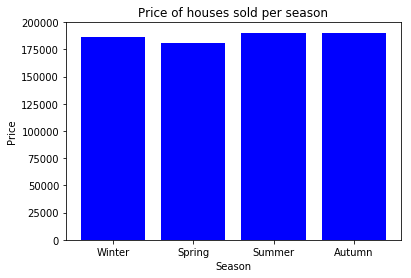

In [49]:
import matplotlib.pyplot as plt
#winter['month'].value_counts().sort_index().plot(kind='bar', color = 'b')
seasons = (winter['Price'].mean(), spring['Price'].mean(), summer['Price'].mean(), autumn['Price'].mean())
plt.bar(np.arange(4),seasons, color = 'b')
plt.title('Price of houses sold per season')
plt.xticks([0,1,2,3],['Winter','Spring','Summer','Autumn'])
plt.xlabel('Season')
plt.ylabel('Price')
plt.savefig('price_of_houses_per_season_exclude_others.pdf')

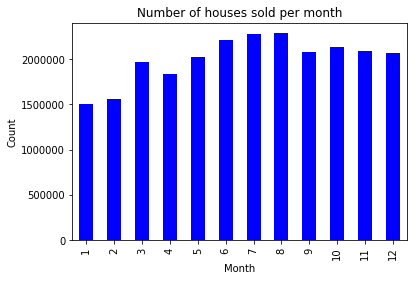

In [26]:
import matplotlib.pyplot as plt
#plt.bar(data['year'].value_counts().sort_index())
data['month'].value_counts().sort_index().plot(kind='bar', color = 'b')
plt.title('Number of houses sold per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig('Number_of_houses_sold_per_month.pdf')

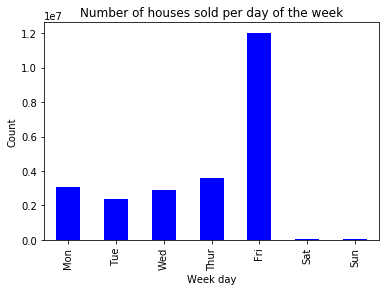

In [78]:
import matplotlib.pyplot as plt
#plt.bar(data['year'].value_counts().sort_index())
data['day'].value_counts().sort_index().plot(kind='bar', color = 'b')
plt.title('Number of houses sold per day of the week')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thur', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Week day')
plt.ylabel('Count')
plt.savefig('Number_of_houses_sold_per_day_of_week.pdf')

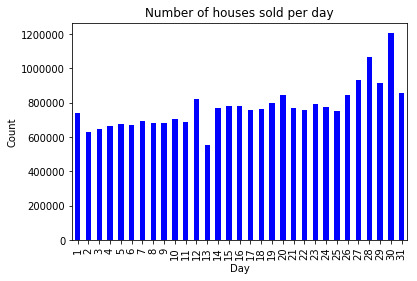

In [77]:
import matplotlib.pyplot as plt
#plt.bar(data['year'].value_counts().sort_index())
data['day_month'].value_counts().sort_index().plot(kind='bar', color = 'b')
plt.title('Number of houses sold per day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.savefig('Number_of_houses_sold_per_day.pdf')

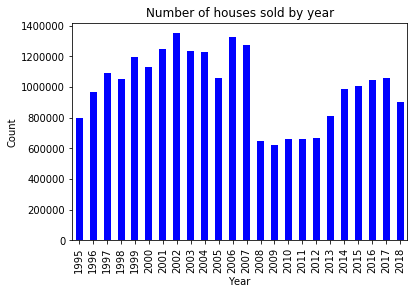

In [27]:
data['year'].value_counts().sort_index().plot(kind='bar', color = 'b')
plt.title('Number of houses sold by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('Number_of_houses_sold_per_year.pdf')

In [65]:
new = data[data['Newold'] == 'Y']

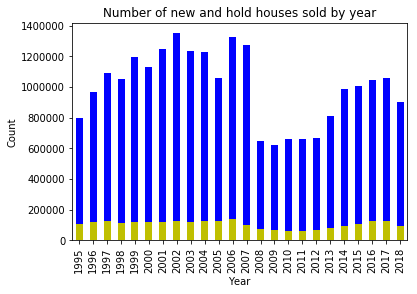

In [62]:
data['year'].value_counts().sort_index().plot(kind='bar', color = 'b')
new['year'].value_counts().sort_index().plot(kind='bar', color = 'y')
plt.title('Number of new and hold houses sold by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('Number_of_houses_sold_per_year_lease.pdf')

In [64]:
data.columns

Index(['Idx', 'Price', 'Date', 'PC', 'Type', 'Newold', 'Freehold', 'year',
       'month'],
      dtype='object')

In [68]:
free = data[data['Freehold'] == 'F']

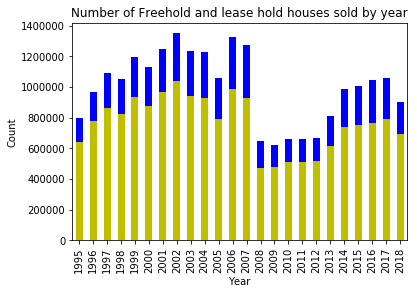

In [69]:
data['year'].value_counts().sort_index().plot(kind='bar', color = 'b')
free['year'].value_counts().sort_index().plot(kind='bar', color = 'y')
plt.title('Number of Freehold and lease hold houses sold by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('Number_of_houses_sold_per_year_lease.pdf')

In [10]:
sample_pp = pd.DataFrame()
for i in range(0, len(data['year'].unique())):
    sample_small = data[data['year'] == data['year'].unique()[i]]
    sample_aux = sample_small.sample(n=100000, random_state = 42)
    sample_pp = sample_pp.append(sample_aux, ignore_index = True)

In [11]:
sample_pp.tail()

,Idx,Price,Date,PC,Type,Newold,Freehold,year
2399995,23655716,230000,2018-10-24 00:00,NE21 4FE,D,N,F,2018
2399996,23411299,106000,2018-05-01 00:00,FY4 2DJ,S,N,F,2018
2399997,23336236,425000,2018-04-18 00:00,TD15 1HX,T,N,F,2018
2399998,23310238,235000,2018-04-19 00:00,HX7 6QA,S,Y,F,2018
2399999,23248074,1280000,2018-10-19 00:00,SW12 8BL,T,N,F,2018


In [12]:
len(sample_pp)

2400000

## Features

Get predictions for the house prices interms of:
* date - take year and month.
* type - D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other 
* New or old - Y = a newly built property, N = an established residential building
* Free hold - Relates to the tenure: F = Freehold, L= Leasehold etc.

In [13]:
def newhold(row):
    if row['Newold'] == 'Y':
        return np.int(1)
    if row['Newold'] == 'N': 
        return np.int(0)

def freehold(row):
    if row['Freehold'] == 'F':
        return np.int(1)
    if row['Freehold'] == 'L':
        return np.int(0)

def housetype(row):
    if row['Type'] == 'O':
        return np.int(0)
    if row['Type'] == 'D':
        return np.int(1)
    if row['Type'] == 'S':
        return np.int(2)
    if row['Type'] == 'T':
        return np.int(3)
    if row['Type'] == 'F':
        return np.int(4)

In [15]:
data_df = sample_pp.copy()
#data_df = data.copy()

In [16]:
data_df['Newold_OHE'] = data_df.apply(lambda row: newhold(row), axis=1)

In [17]:
data_df['freehold_OHE'] = data_df.apply(lambda row: freehold(row), axis=1)

In [18]:
data_df['Type_OHE'] = data_df.apply(lambda row: housetype(row), axis=1)

In [19]:
#data_df['year'] = pd.DatetimeIndex(data_df['Date']).year

In [20]:
data_df['month'] = pd.DatetimeIndex(data_df['Date']).month

In [21]:
data_df['PC_O'], data_df['PC_1'] = data_df['PC'].str.split(' ', 1).str

In [22]:
data_df.head()

,Idx,Price,Date,PC,Type,Newold,Freehold,year,Newold_OHE,freehold_OHE,Type_OHE,month,PC_O,PC_1
0,374492,286000,1995-11-24 00:00,KT8 9AZ,D,Y,F,1995,1,1.0,1,11,KT8,9AZ
1,531195,98950,1995-10-17 00:00,HR8 1PP,D,N,F,1995,0,1.0,1,10,HR8,1PP
2,481861,86950,1995-06-16 00:00,HP2 4UG,T,Y,F,1995,1,1.0,3,6,HP2,4UG
3,651484,45000,1995-05-24 00:00,WA11 8HD,S,N,L,1995,0,0.0,2,5,WA11,8HD
4,628854,33000,1995-09-20 00:00,DH3 2DG,S,N,F,1995,0,1.0,2,9,DH3,2DG


In [23]:
len(data_df)

2400000

In [ ]:
data_df.columns

In [24]:
data_df.to_csv('pp.csv', columns=['Idx', 'Price','PC', 'PC_O', 'PC_1', 
       'Newold_OHE', 'freehold_OHE', 'Type_OHE', 'month', 'year'])